In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 

In [2]:
train=pd.read_csv('train_eda.csv')
test=pd.read_csv('test_eda.csv')

In [3]:
train.head()

,outcometype,ageuponoutcome,has_name,is_mix,cat_breed_shorthair,cat_breed_mediumhair,cat_breed_longhair,cat_breed_siamese,dog_breed_chihuahua,dog_breed_pitbull,...,age_old,primary_color_Black,primary_color_Blue,primary_color_Brown,primary_color_Gray,primary_color_Orange,primary_color_Tan,primary_color_Tricolor,primary_color_White,month
0,Return_to_owner,1.00,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Feb
1,Euthanasia,1.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Oct
2,Adoption,2.00,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Jan
3,Transfer,0.06,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,July
4,Transfer,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Nov


In [4]:
train['outcometype'] = [0 if x == 'Return_to_owner' 
                   else 1 if x == "Euthanasia" 
                   else 2 if x=='Adoption'
                   else 3 if x=='Transfer'
                   else 4 for x in train['outcometype'] ]

In [5]:
y =train.outcometype 
X = train.drop(columns=['outcometype','month'])

In [6]:
y = utils.to_categorical(y, num_classes=5)

In [7]:
X.shape

(26728, 26)

In [8]:
y.shape

(26728, 5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=73)

In [10]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [29]:
model = Sequential()

In [30]:

model.add(Dense(20, # num of neurons in first hidden layer
                input_shape=(26,), # num neurons in input layer
                activation='relu'))

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [31]:

model.layers

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_test_sc, y_test),
                    epochs=200,
                    batch_size=512)

Epoch 1/200
40/40 [==============================] - 2s 16ms/step - loss: 1.7712 - accuracy: 0.1094 - val_loss: 1.6437 - val_accuracy: 0.1835
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.5956 - accuracy: 0.3417 - val_loss: 1.5627 - val_accuracy: 0.4750
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 1.5407 - accuracy: 0.4969 - val_loss: 1.5249 - val_accuracy: 0.5162
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 1.5005 - accuracy: 0.5497 - val_loss: 1.4819 - val_accuracy: 0.5648
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 1.4475 - accuracy: 0.5803 - val_loss: 1.4218 - val_accuracy: 0.5765
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3758 - accuracy: 0.5888 - val_loss: 1.3450 - val_accuracy: 0.5850
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 1.2867 - accuracy: 0.6017 - val_loss: 1.2511 - val_accuracy: 0.6016
Epoch 8/200


Epoch 59/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8467 - accuracy: 0.6534 - val_loss: 0.8752 - val_accuracy: 0.6350
Epoch 60/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8462 - accuracy: 0.6547 - val_loss: 0.8744 - val_accuracy: 0.6396
Epoch 61/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8458 - accuracy: 0.6536 - val_loss: 0.8756 - val_accuracy: 0.6375
Epoch 62/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8454 - accuracy: 0.6542 - val_loss: 0.8751 - val_accuracy: 0.6374
Epoch 63/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8453 - accuracy: 0.6548 - val_loss: 0.8748 - val_accuracy: 0.6365
Epoch 64/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8450 - accuracy: 0.6544 - val_loss: 0.8742 - val_accuracy: 0.6378
Epoch 65/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.6546 - val_loss: 0.8738 - val_accuracy: 0.6384
Epoch 

40/40 [==============================] - 0s 4ms/step - loss: 0.8379 - accuracy: 0.6560 - val_loss: 0.8720 - val_accuracy: 0.6420
Epoch 117/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8378 - accuracy: 0.6549 - val_loss: 0.8720 - val_accuracy: 0.6405
Epoch 118/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8379 - accuracy: 0.6561 - val_loss: 0.8718 - val_accuracy: 0.6402
Epoch 119/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8376 - accuracy: 0.6547 - val_loss: 0.8724 - val_accuracy: 0.6401
Epoch 120/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8377 - accuracy: 0.6556 - val_loss: 0.8725 - val_accuracy: 0.6410
Epoch 121/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8376 - accuracy: 0.6554 - val_loss: 0.8728 - val_accuracy: 0.6402
Epoch 122/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8373 - accuracy: 0.6560 - val_loss: 0.8724 - val_accuracy: 0.6414
Epoch 123/200

40/40 [==============================] - 0s 5ms/step - loss: 0.8341 - accuracy: 0.6562 - val_loss: 0.8744 - val_accuracy: 0.6423
Epoch 174/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8341 - accuracy: 0.6560 - val_loss: 0.8745 - val_accuracy: 0.6405
Epoch 175/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8346 - accuracy: 0.6567 - val_loss: 0.8747 - val_accuracy: 0.6401
Epoch 176/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8344 - accuracy: 0.6562 - val_loss: 0.8747 - val_accuracy: 0.6416
Epoch 177/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8345 - accuracy: 0.6564 - val_loss: 0.8742 - val_accuracy: 0.6401
Epoch 178/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8349 - accuracy: 0.6559 - val_loss: 0.8746 - val_accuracy: 0.6410
Epoch 179/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8344 - accuracy: 0.6562 - val_loss: 0.8742 - val_accuracy: 0.6411
Epoch 180/200

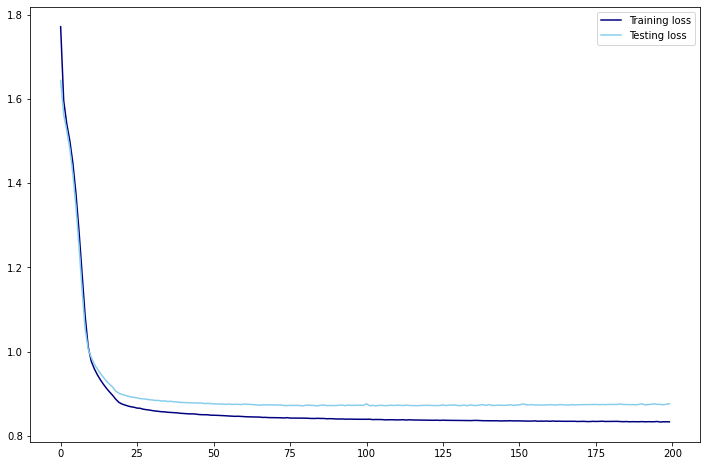

In [34]:
# Visualize the loss
train_loss = history.history['loss'] 
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

Model began overfitting quickly after about 10 epochs